# COMP30027 ML Project 2

### 0. Preparation

#### 0.1 Import libraries and load data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
test_dataset = pd.read_csv(r'project_data/test_dataset.csv')
train_dataset = pd.read_csv(r'project_data/train_dataset.csv')

# Load doc2vec features
test_genre = pd.DataFrame(np.load(r'project_data/features_doc2vec/test_doc2vec_features_genre.npy'))
test_plot_keywords = pd.DataFrame(np.load(r'project_data/features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
train_genre = pd.DataFrame(np.load(r'project_data/features_doc2vec/train_doc2vec_features_genre.npy'))
train_plot_keywords = pd.DataFrame(np.load(r'project_data/features_doc2vec/train_doc2vec_features_plot_keywords.npy'))

# Load fasttext features
test_title_embedding = pd.DataFrame(np.load(r'project_data/features_fasttext/test_fasttext_title_embeddings.npy'))
train_title_embedding = pd.DataFrame(np.load(r'project_data/features_fasttext/train_fasttext_title_embeddings.npy'))

#### 0.2 Data inspection

In [10]:
# Show unique values of each column
train_dataset.nunique()

id                           3004
director_name                1460
num_critic_for_reviews        497
duration                      144
director_facebook_likes       373
actor_3_facebook_likes        845
actor_2_name                 1903
actor_1_facebook_likes        668
gross                        2929
genres                        675
actor_1_name                 1265
movie_title                  2942
num_voted_users              2954
cast_total_facebook_likes    2653
actor_3_name                 2198
facenumber_in_poster           19
plot_keywords                2943
num_user_for_reviews          869
language                       32
country                        42
content_rating                 12
title_year                     72
actor_2_facebook_likes        811
movie_facebook_likes          582
title_embedding              2942
average_degree_centrality      79
imdb_score_binned               5
dtype: int64

In [11]:
# Check language distribution
train_dataset.groupby('language').size().sort_values(ascending=False)

language
English       2872
French          32
Spanish         19
Japanese         9
Mandarin         9
German           9
Cantonese        5
Italian          5
Korean           4
Portuguese       4
Hindi            3
Dutch            3
Norwegian        3
Danish           3
Persian          2
Thai             2
Aboriginal       2
Indonesian       2
Dari             2
Arabic           1
Kazakh           1
Hungarian        1
Hebrew           1
Maya             1
Mongolian        1
Filipino         1
Czech            1
Romanian         1
Bosnian          1
Aramaic          1
Vietnamese       1
Zulu             1
dtype: int64

In [12]:
# Split a temporary dataset for inspection
inspection = train_dataset.drop(columns=[
    'id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title',
    'title_embedding', 'genres', 'country', 'content_rating', 'plot_keywords', 'language'
])
inspection.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739,2.250333
std,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183,0.691451
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300,0.000000
25%,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825,2.000000
50%,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426,2.000000
75%,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401,3.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354,4.000000


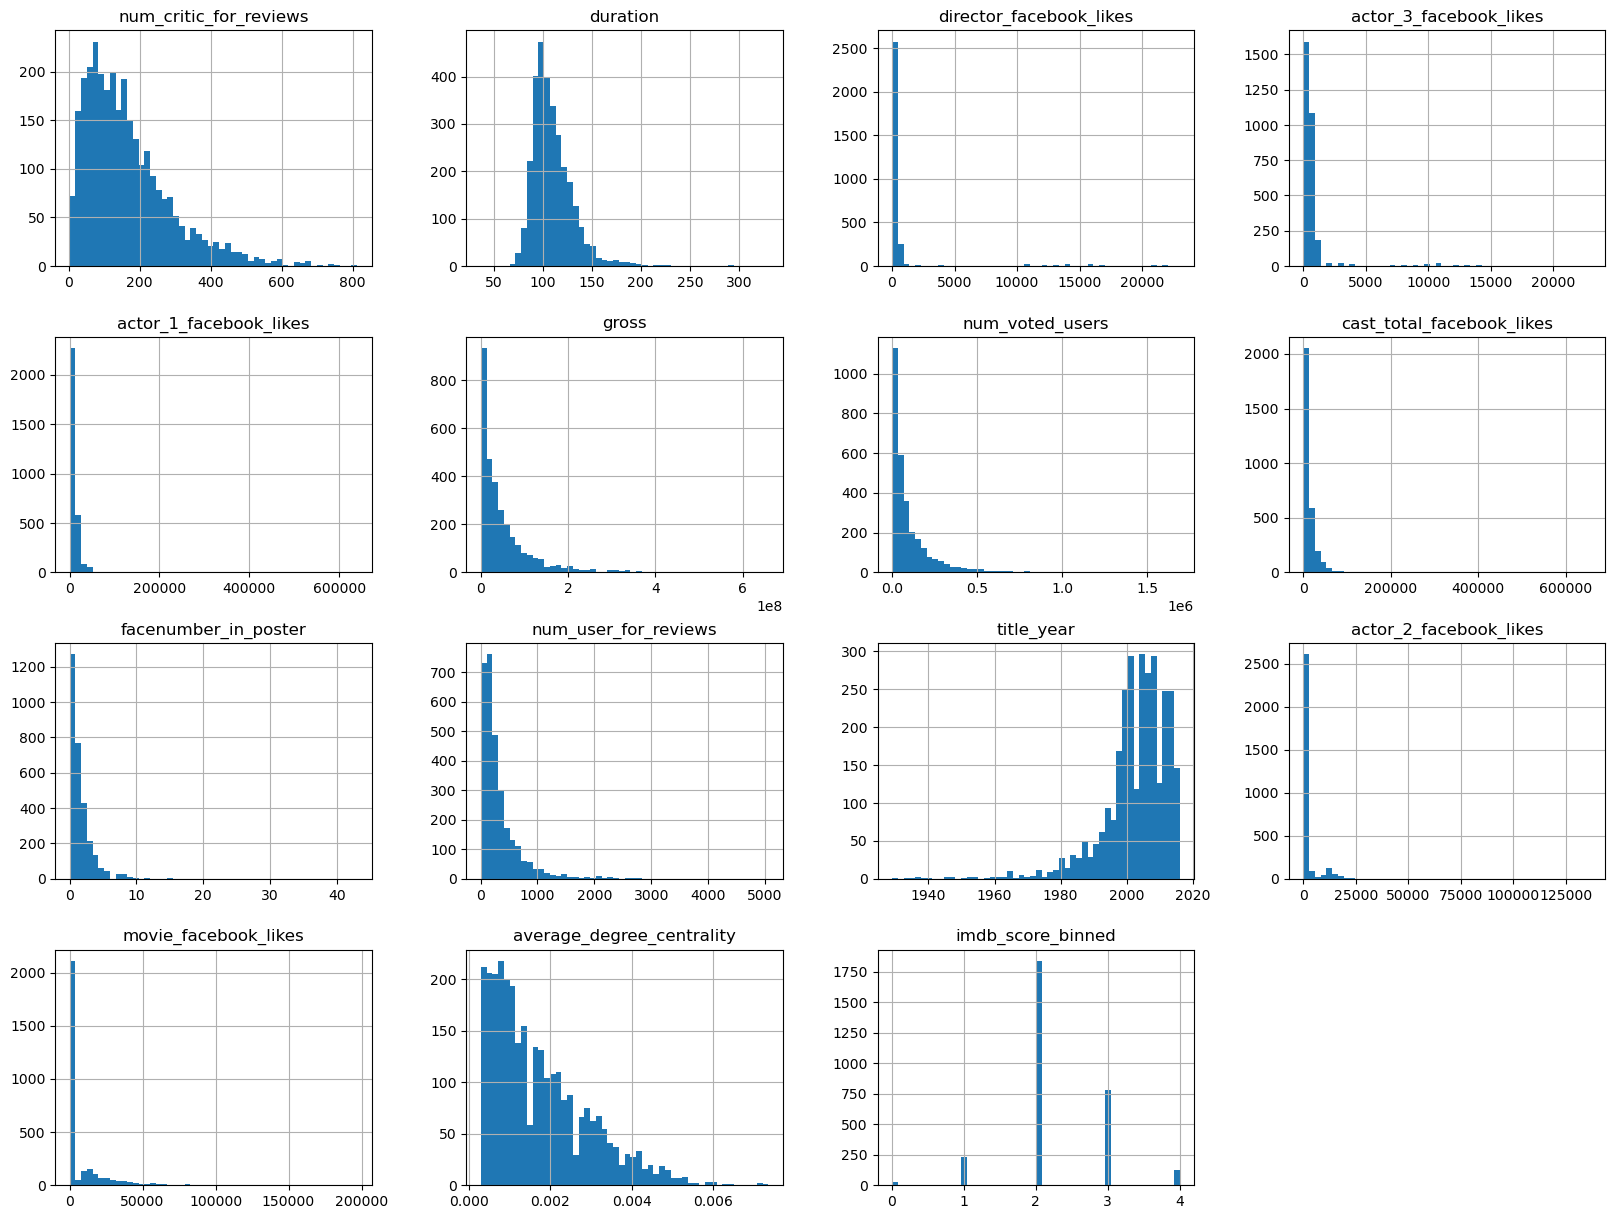

In [13]:
# Histograms
inspection.hist(bins=50, figsize=(20,15))
plt.show()

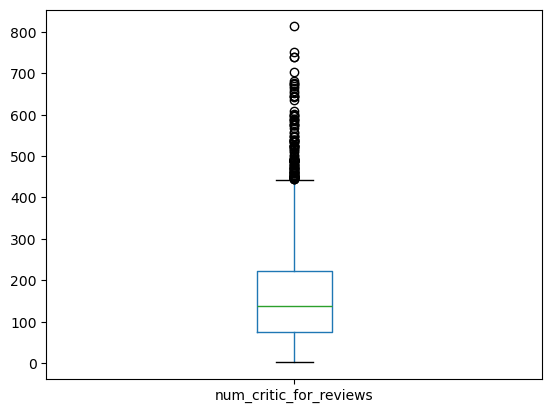

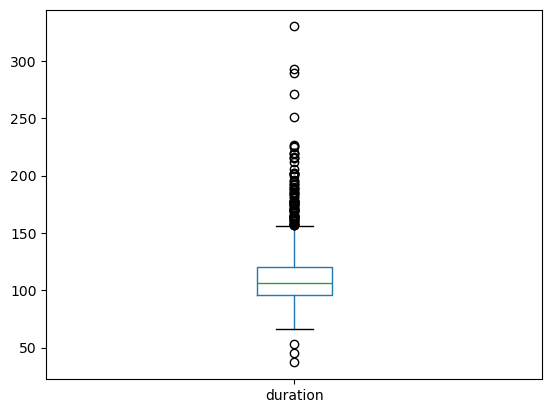

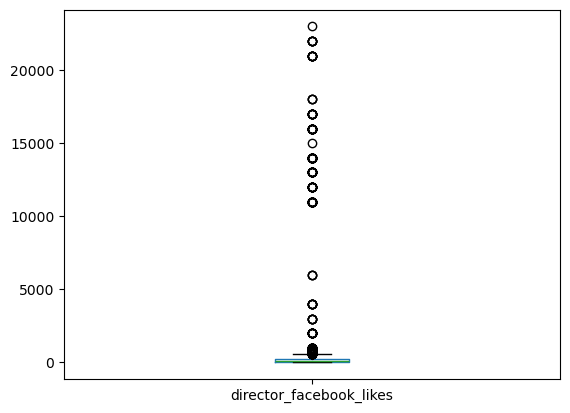

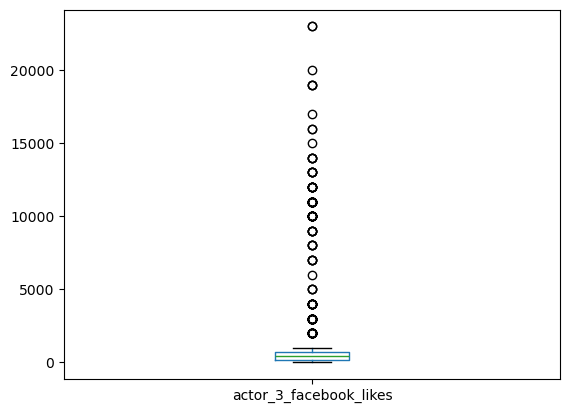

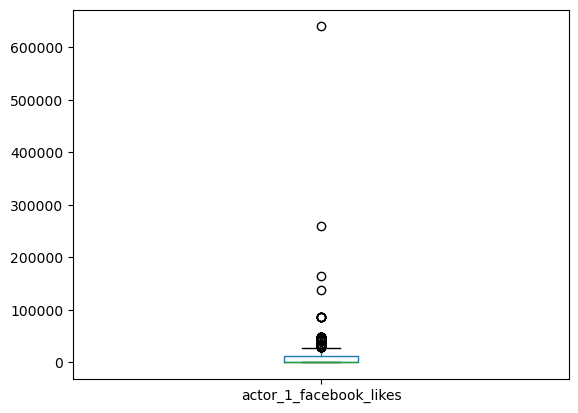

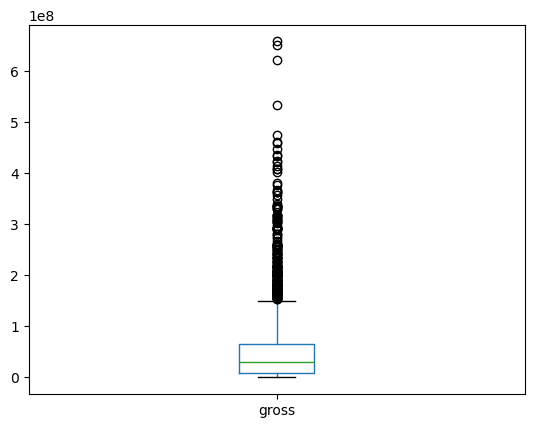

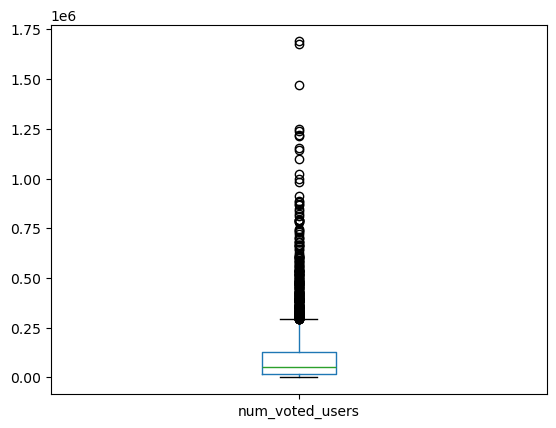

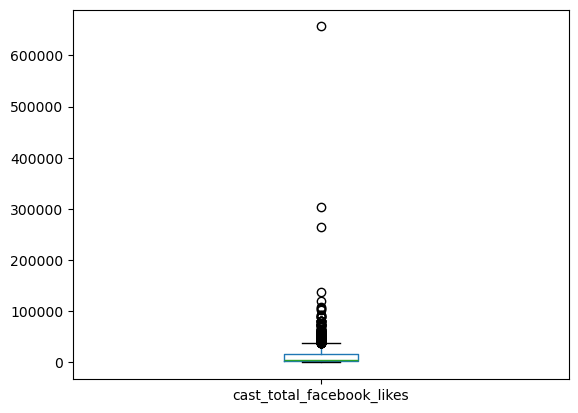

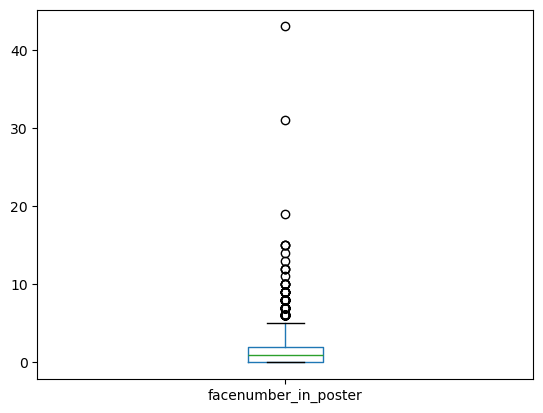

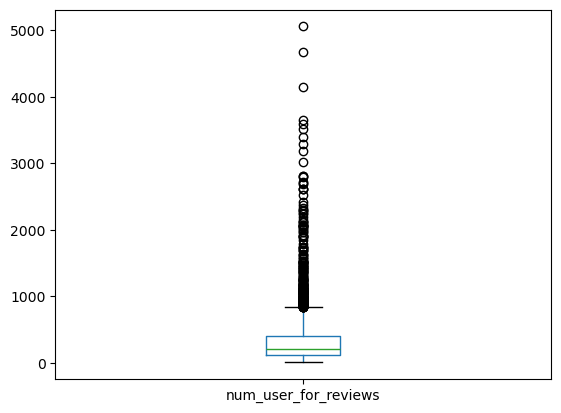

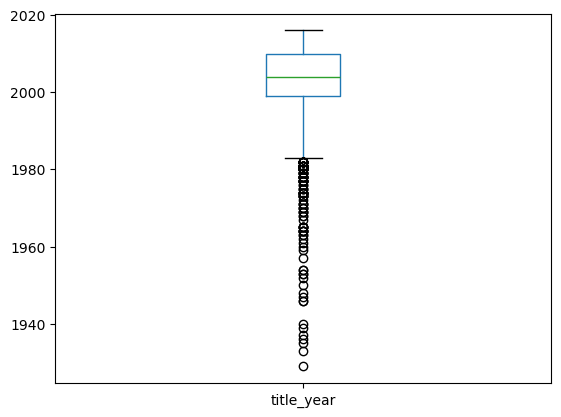

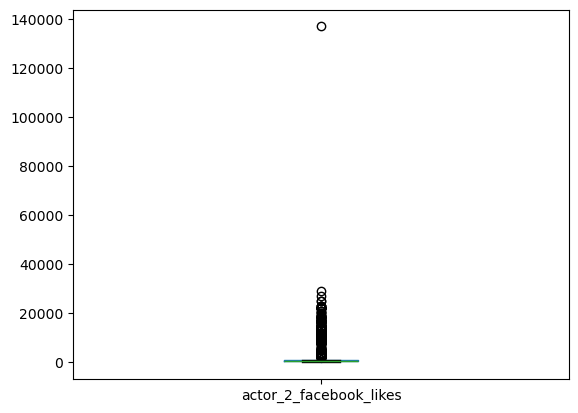

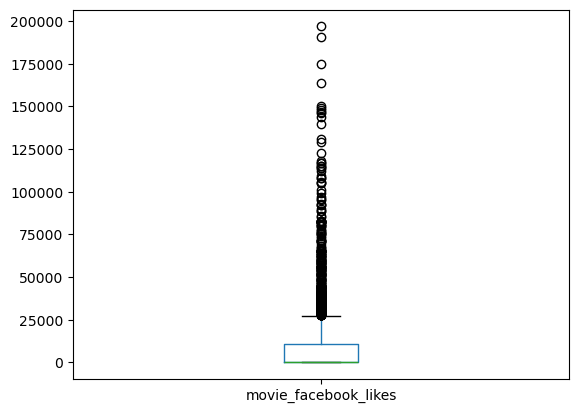

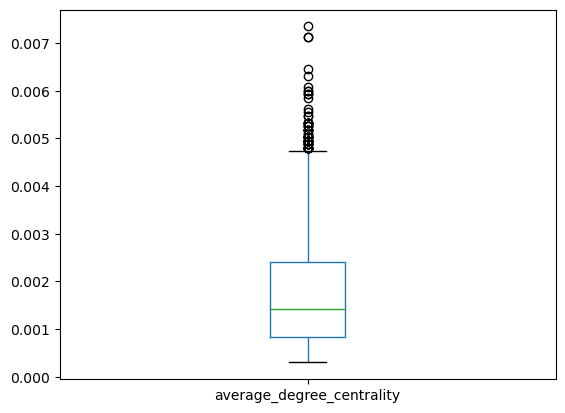

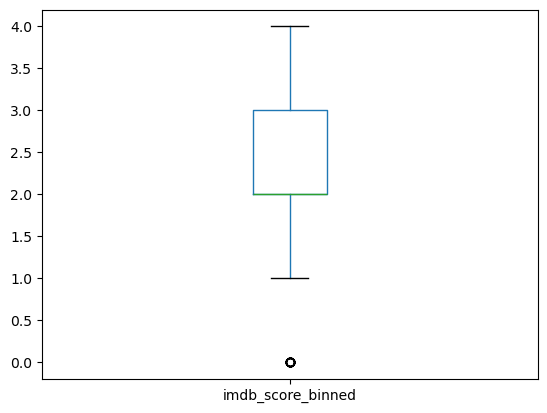

In [14]:
# Boxplots
for col in inspection.columns:
    inspection.boxplot(column=[col])
    plt.grid(False)
    plt.show()

In [15]:
# Correlation matrix
corr_matrix = inspection.corr()
print(corr_matrix)

                           num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.233593   
duration                                 0.233593  1.000000   
director_facebook_likes                  0.173238  0.175870   
actor_3_facebook_likes                   0.250428  0.124426   
actor_1_facebook_likes                   0.156197  0.079785   
gross                                    0.459377  0.266438   
num_voted_users                          0.580511  0.345424   
cast_total_facebook_likes                0.225191  0.115516   
facenumber_in_poster                    -0.031220  0.021318   
num_user_for_reviews                     0.547682  0.360218   
title_year                               0.417861 -0.127640   
actor_2_facebook_likes                   0.247378  0.124402   
movie_facebook_likes                     0.706790  0.207761   
average_degree_centrality                0.237633  0.252224   
imdb_score_binned                        0.323469  0.34

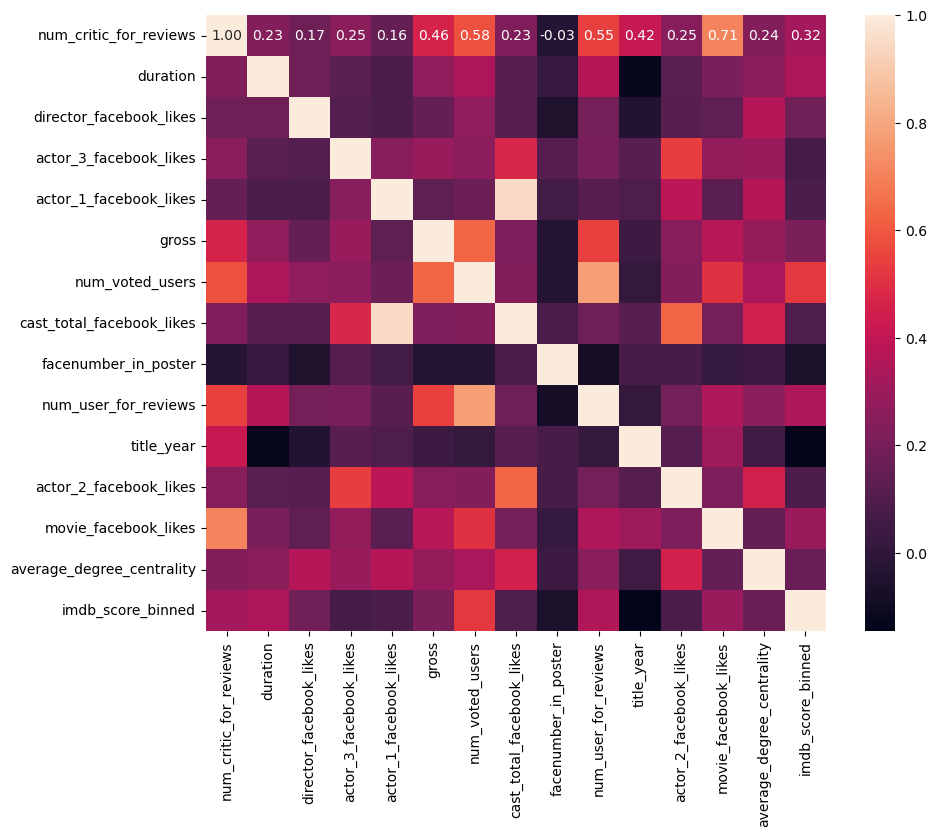

In [16]:
# Heatmap based on correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

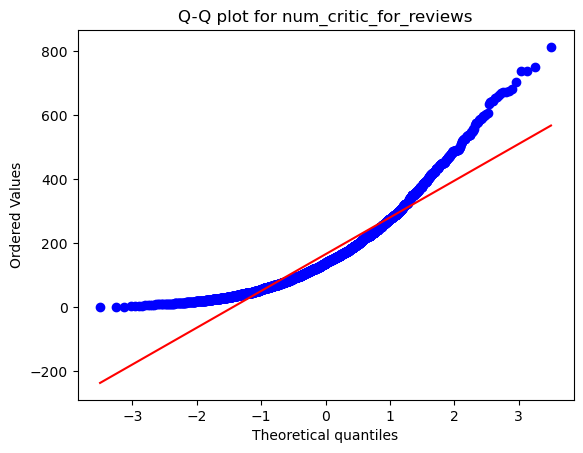

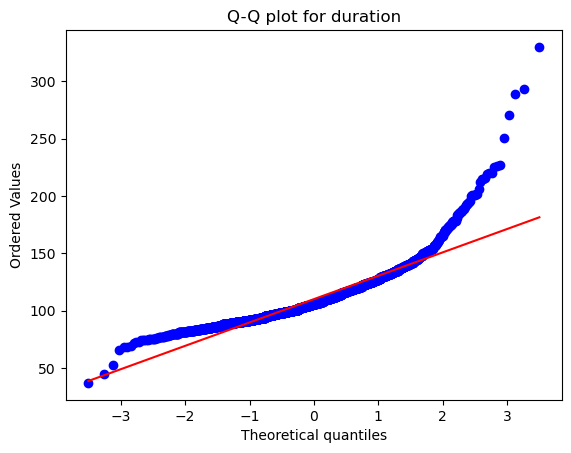

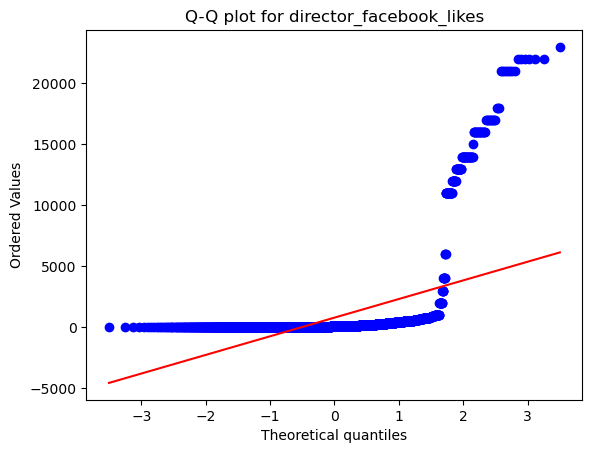

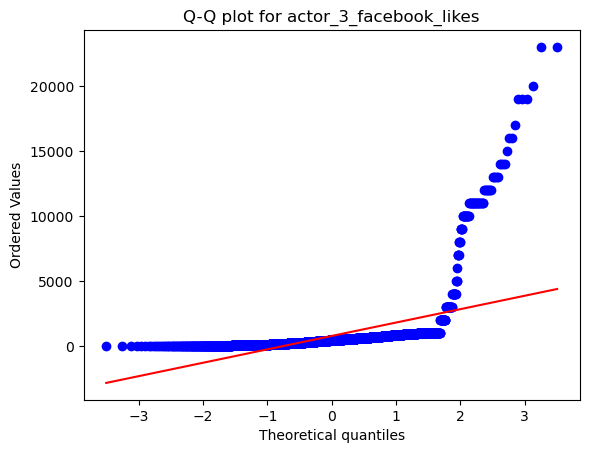

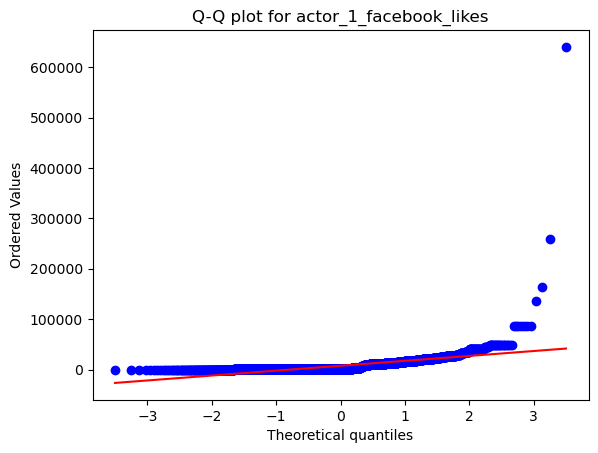

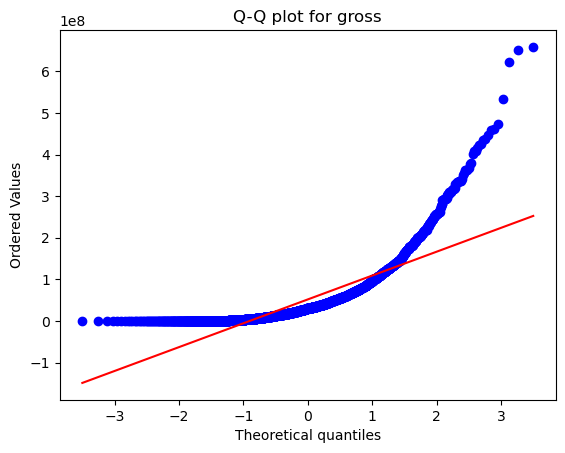

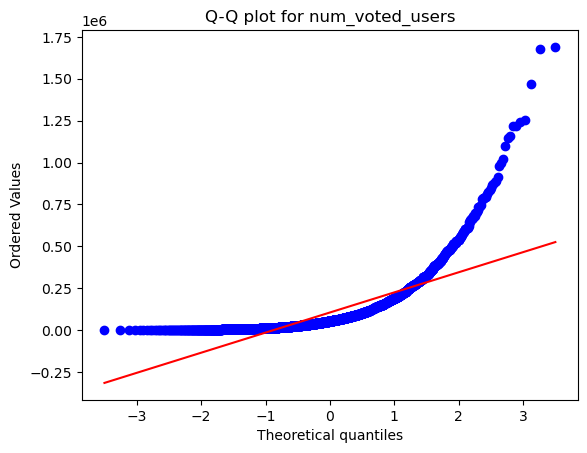

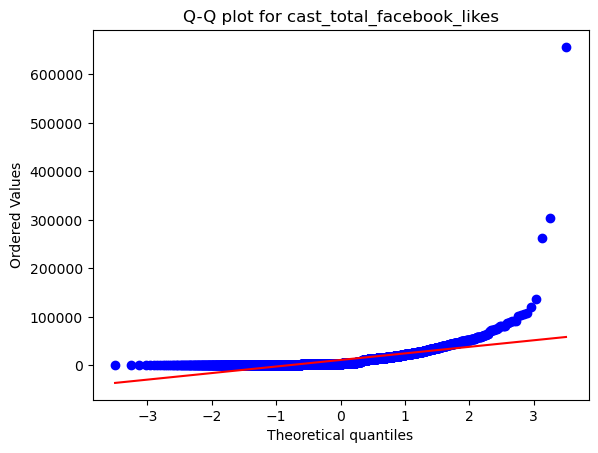

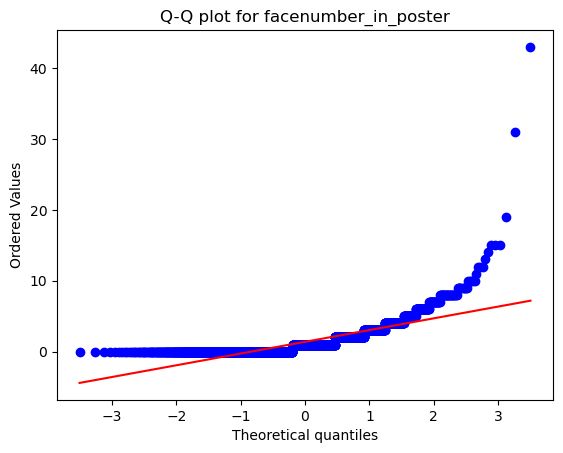

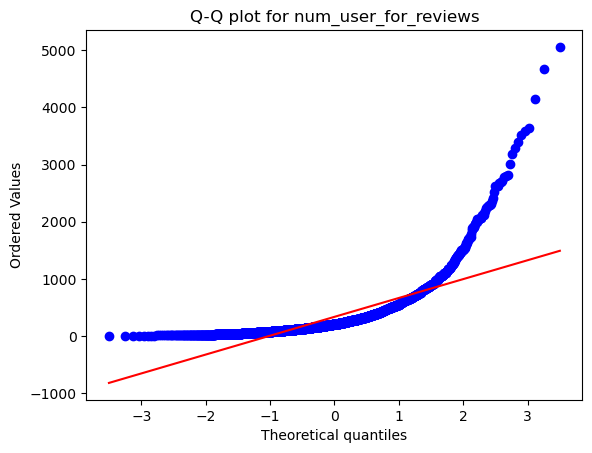

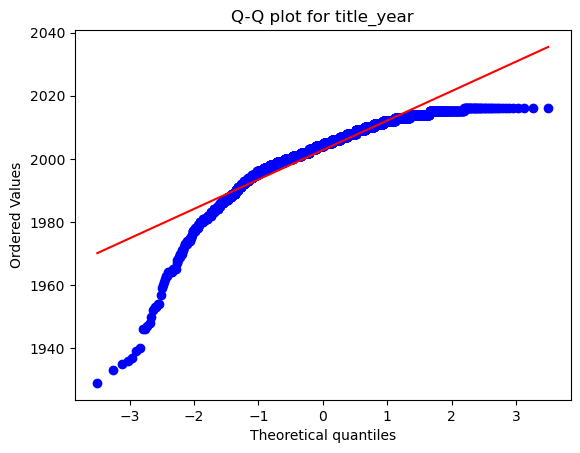

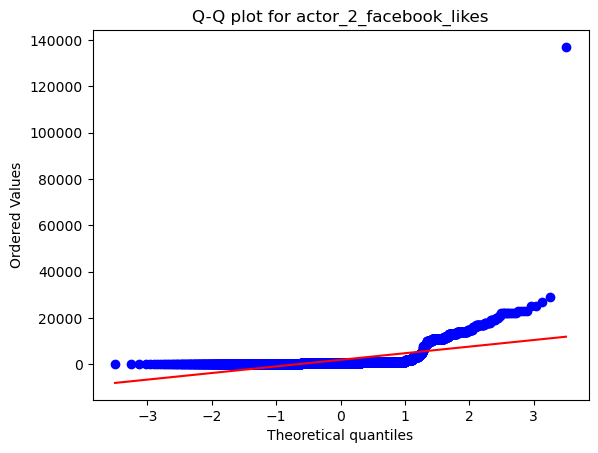

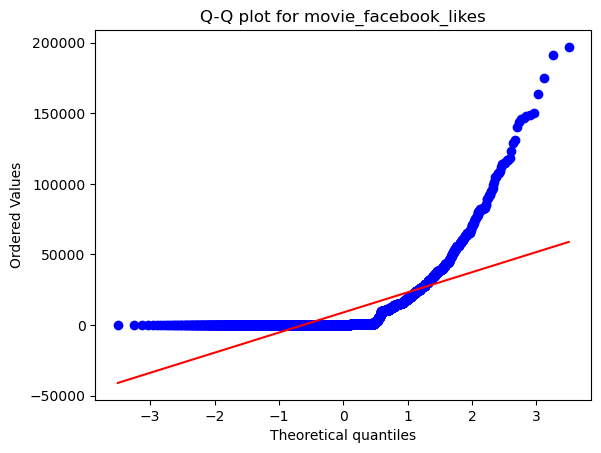

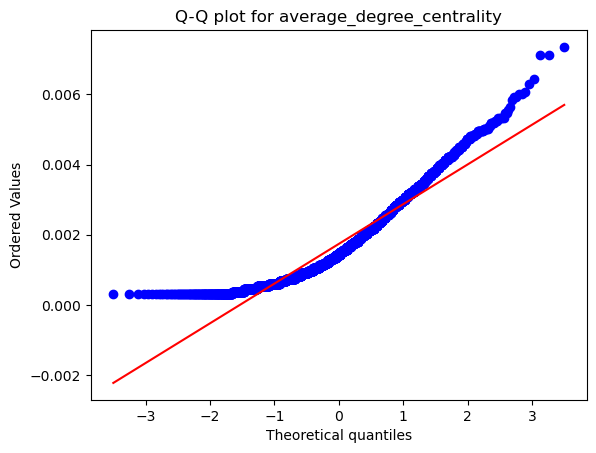

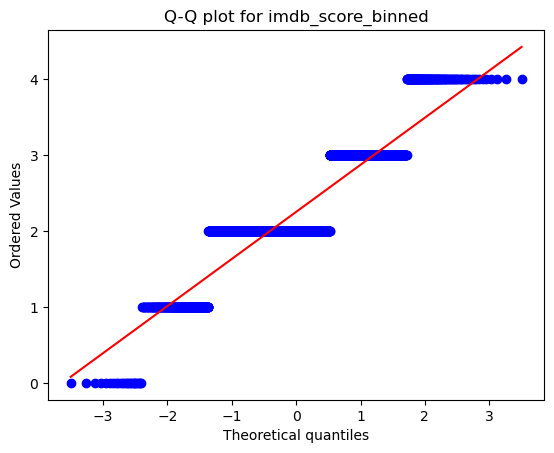

In [17]:
# Q-Q plots
for col in inspection.select_dtypes(include=[np.number]).columns:
    stats.probplot(inspection[col], dist="norm", plot=plt)
    plt.title('Q-Q plot for ' + col)
    plt.show()

### 1. Preprocessing

#### 1.1 Drop text features

Drop text features, id, and format language to a boolean to indicate whether is in English

In [18]:
# Get a clean train dataset
clean = train_dataset.drop(columns=[
    'id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title',
    'title_embedding', 'genres', 'country', 'content_rating', 'plot_keywords', 'facenumber_in_poster', 
    'actor_2_facebook_likes', 'actor_3_facebook_likes'
])
clean['language'] = (clean['language'] == 'English').astype(int)

# Get a clean test dataset
clean_test = test_dataset.drop(columns=[
    'id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title',
    'title_embedding', 'genres', 'country', 'content_rating', 'plot_keywords', 'facenumber_in_poster', 
    'actor_2_facebook_likes', 'actor_3_facebook_likes'
])
clean_test['language'] = (clean_test['language'] == 'English').astype(int)

#### 1.2 Split features and label

In [19]:
X_train = clean.drop(columns=['imdb_score_binned'])
y_train = clean['imdb_score_binned']
X_test = clean_test.copy()

#### 1.3 StandardScalar normalization

In [20]:
# Log transformation
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()
skipped_features = ['title_year', 'language']
for feature in X_train_transformed.columns:
    if feature not in skipped_features:
        X_train_transformed[feature] = np.log1p(X_train_transformed[feature])
        X_test_transformed[feature] = np.log1p(X_test_transformed[feature])

# Standardization
scaler = StandardScaler().fit(X_train_transformed)
X_train_scaled = scaler.transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

### 2. Model fitting

#### 2.1 Decision tree

In [21]:
# With normalization
dt_clf = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_clf, X_train_scaled, y_train, cv=5)

# Without normalization
dt_nn_scores = cross_val_score(dt_clf, X_train_transformed, y_train, cv=5)
dt_clf.fit(X_train_scaled, y_train)
dt_scores.mean(), dt_scores.std(), dt_nn_scores.mean(), dt_nn_scores.std()

(0.61618358291736,
 0.01335758405301184,
 0.6168496949528564,
 0.013340806301497721)

#### 2.2 Ramdom forest

In [22]:
rf_clf = RandomForestClassifier()
rf_scores = cross_val_score(rf_clf, X_train_scaled, y_train, cv=5)
rf_clf.fit(X_train_scaled, y_train)
rf_scores.mean(), rf_scores.std()

(0.7247049362174154, 0.011643897199864885)

#### 2.3 Logistic regression

In [23]:
lr_clf = LogisticRegression(
    max_iter=1000
)
lr_scores = cross_val_score(lr_clf, X_train_scaled, y_train, cv=5)
lr_clf.fit(X_train_scaled, y_train)
lr_scores.mean(), lr_scores.std()

(0.7057254575707155, 0.01022956588280063)

#### 2.4 Stack classifier

In [24]:
# Make title embedding train and test sets
title_train = train_title_embedding.iloc[X_train.index]
title_test = test_title_embedding.iloc[X_test.index]

In [25]:
lr_title_clf = LogisticRegression(
    max_iter=1000
)
lr_title_scores = cross_val_score(lr_title_clf, title_train, y_train, cv=5)
lr_title_clf.fit(title_train, y_train)
lr_title_scores.mean(), lr_title_scores.std()

(0.6121841375485302, 0.000863390977629644)

In [26]:
stack = StackingClassifier([('lr', lr_clf), ('lr_title', lr_title_clf)], final_estimator=LogisticRegression())
stack_scores = cross_val_score(stack, X_train_scaled, y_train, cv=5)
stack_scores.mean(), stack_scores.std()

(0.7043943427620633, 0.009671090150027798)

In [27]:
X_train_scaled_with_title = np.column_stack([X_train_scaled, lr_title_clf.predict(title_train)])
X_test_scaled_with_title = np.column_stack([X_test_scaled, lr_title_clf.predict(title_test)])

In [28]:
lr_with_title_clf = LogisticRegression(
    max_iter=1000
)
lr_with_title_scores = cross_val_score(lr_with_title_clf, X_train_scaled_with_title, y_train, cv=5)
lr_with_title_clf.fit(X_train_scaled_with_title, y_train)
lr_with_title_scores.mean(), lr_with_title_scores.std()

(0.7057254575707155, 0.01022956588280063)

#### 2.5 Multilayer perceptron

In [29]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64, 16), early_stopping=True, max_iter=100, random_state=42,
    learning_rate='adaptive', learning_rate_init=0.01
)
mlp_scores = cross_val_score(mlp_clf, X_train_scaled, y_train, cv=5)
mlp_clf.fit(X_train_scaled, y_train)
mlp_scores.mean(), mlp_scores.std()

(0.7077237936772047, 0.004954899431349026)

#### 2.6 Result review

In [30]:
models = ['Decision tree', 'Random forest', 'Logistic regression', 'Stack Classifier', 'Multilayer perceptron']
mean_scores = [dt_scores.mean(), rf_scores.mean(), lr_scores.mean(), lr_with_title_scores.mean(), mlp_scores.mean()]
std_scores = [dt_scores.std(), rf_scores.std(), lr_scores.std(), lr_with_title_scores.std(), mlp_scores.std()]

results_df = pd.DataFrame({
    'Model': models,
    'Mean accuracy': mean_scores,
    'Std deviation': std_scores
})

print(results_df)

                   Model  Mean accuracy  Std deviation
0          Decision tree       0.616184       0.013358
1          Random forest       0.724705       0.011644
2    Logistic regression       0.705725       0.010230
3       Stack Classifier       0.705725       0.010230
4  Multilayer perceptron       0.707724       0.004955


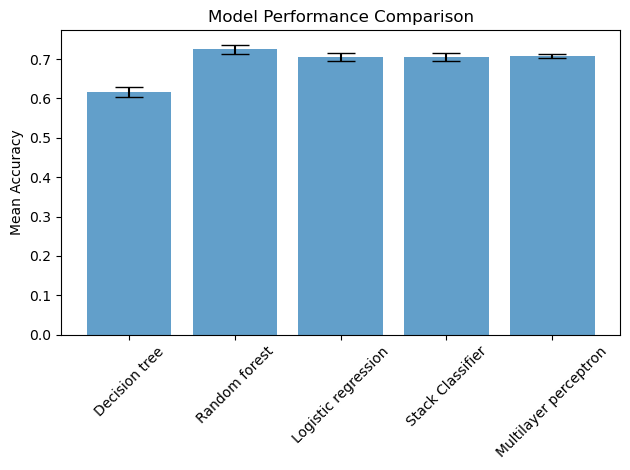

In [31]:
y_pos = np.arange(len(models))

plt.bar(y_pos, mean_scores, yerr=std_scores, align='center', alpha=0.7, capsize=10)
plt.xticks(y_pos, models, rotation=45)
plt.ylabel('Mean Accuracy')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

#### 2.7 Predict test set

In [32]:
classifiers = {
    ('dt', dt_clf),
    ('rf', rf_clf),
    ('lr', lr_clf),
    ('stack', lr_with_title_clf),
    ('mlp', mlp_clf)
}

for name, classifier in classifiers:

    if classifier == lr_with_title_clf:
        y_test = classifier.predict(X_test_scaled_with_title)
    else:
        y_test = classifier.predict(X_test_scaled)

    results_df = pd.DataFrame({
        'id': test_dataset['id'],
        'imdb_score_binned': y_test
    })
    results_df.to_csv(f"{name}_predictions.csv", index=False)

### 3. Evaluation

#### 3.1 Decision tree

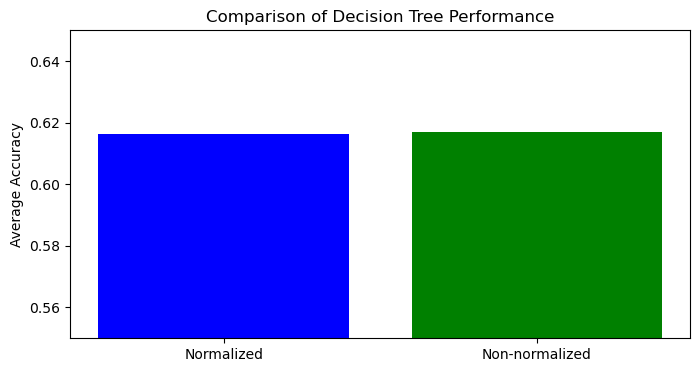

In [33]:
normalized_score = dt_scores.mean()
non_normalized_score = dt_nn_scores.mean()

labels = ['Normalized', 'Non-normalized']
values = [normalized_score, non_normalized_score]

plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Average Accuracy')
plt.title('Comparison of Decision Tree Performance')
plt.ylim([0.55, 0.65])
plt.show()

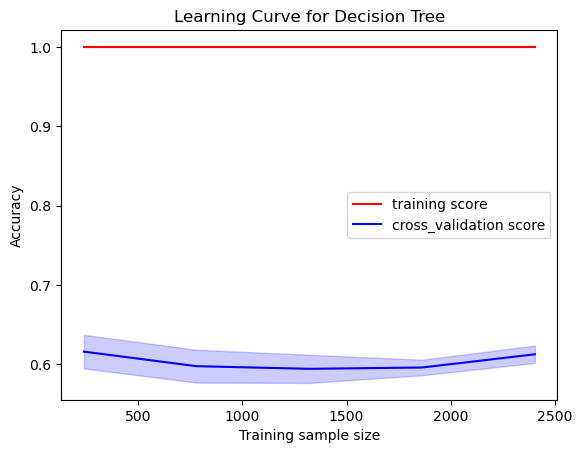

In [34]:
train_size, train_scores, validation_scores = learning_curve(
    dt_clf, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1, 5), cv=5, n_jobs=-1
)

mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

plt.plot(train_size, mean_train_scores, label='training score', color='r')
plt.fill_between(train_size, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training sample size')
plt.ylabel('Accuracy')
plt.show()

#### 3.2 Random forest

In [35]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

num_voted_users              0.160690
num_user_for_reviews         0.109347
gross                        0.100490
duration                     0.092387
title_year                   0.089977
num_critic_for_reviews       0.083492
cast_total_facebook_likes    0.079748
director_facebook_likes      0.070871
movie_facebook_likes         0.069104
actor_1_facebook_likes       0.064281
average_degree_centrality    0.061828
language                     0.017785
dtype: float64

<Axes: >

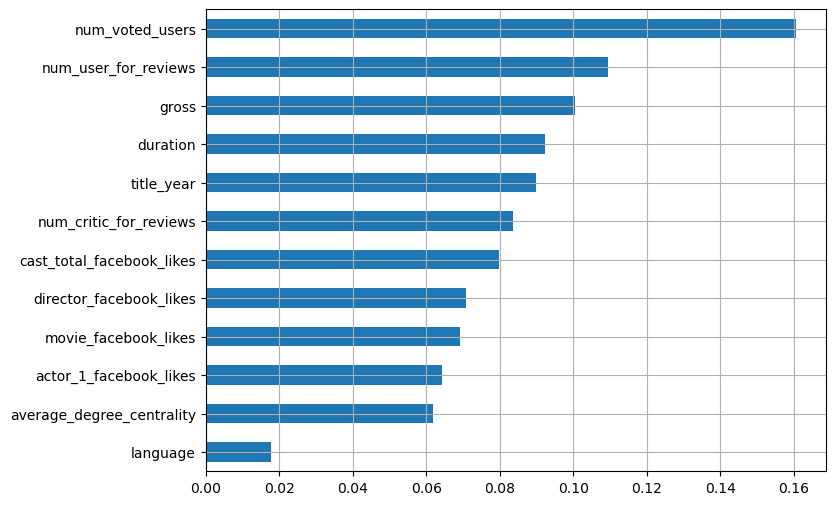

In [36]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values().plot.barh(
    grid=True, figsize=(8,6)
)

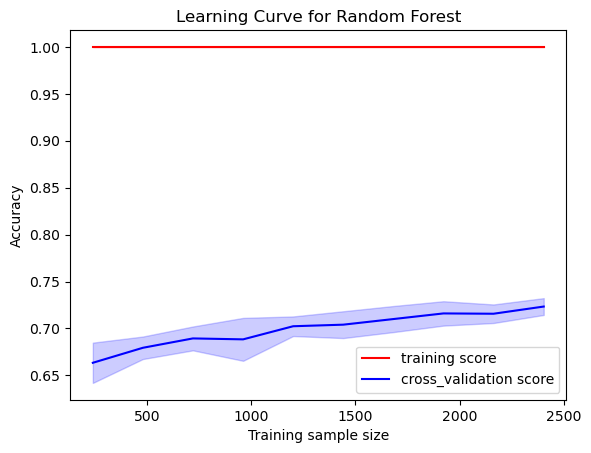

In [37]:
train_size, train_scores, validation_scores = learning_curve(
    rf_clf, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1, 10), cv=5, n_jobs=-1
)

mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

plt.plot(train_size, mean_train_scores, label='training score', color='r')
plt.fill_between(train_size, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training sample size')
plt.ylabel('Accuracy')
plt.show()

#### 3.3 Logistic regression

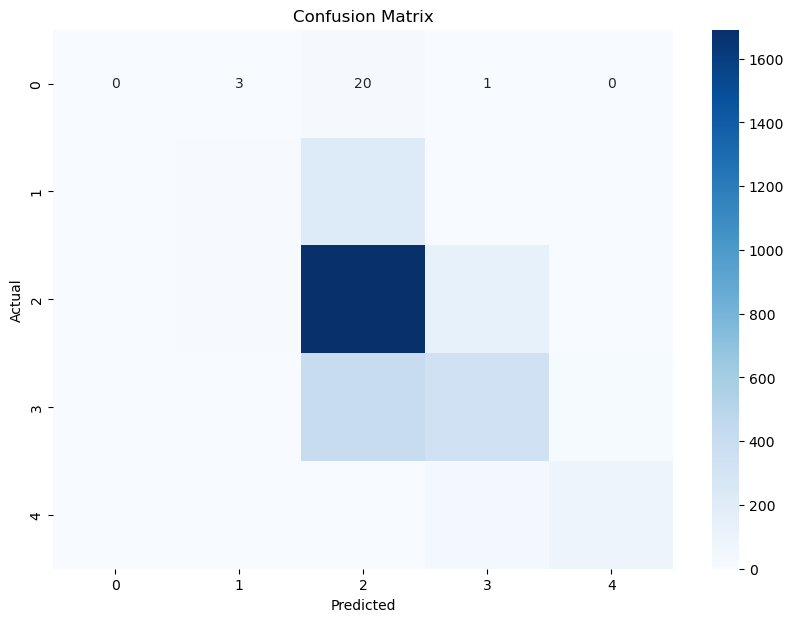

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_train, lr_clf.predict(X_train_scaled)), 
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


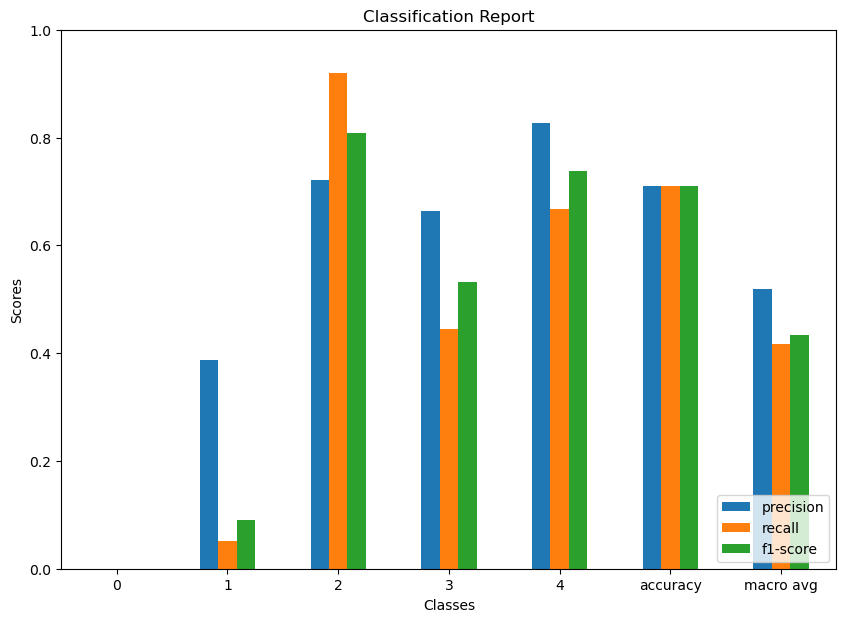

In [39]:
report = classification_report(y_train, lr_clf.predict(X_train_scaled), output_dict=True)
report_df = pd.DataFrame(report).transpose()

metrics = ['precision', 'recall', 'f1-score']

report_df[metrics].iloc[:-1].plot(kind='bar', figsize=(10, 7))
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

#### 3.4 Stack classifier

In [40]:
y_title = lr_title_clf.predict(title_train)
pd.Series(y_title).value_counts()

2    3004
Name: count, dtype: int64

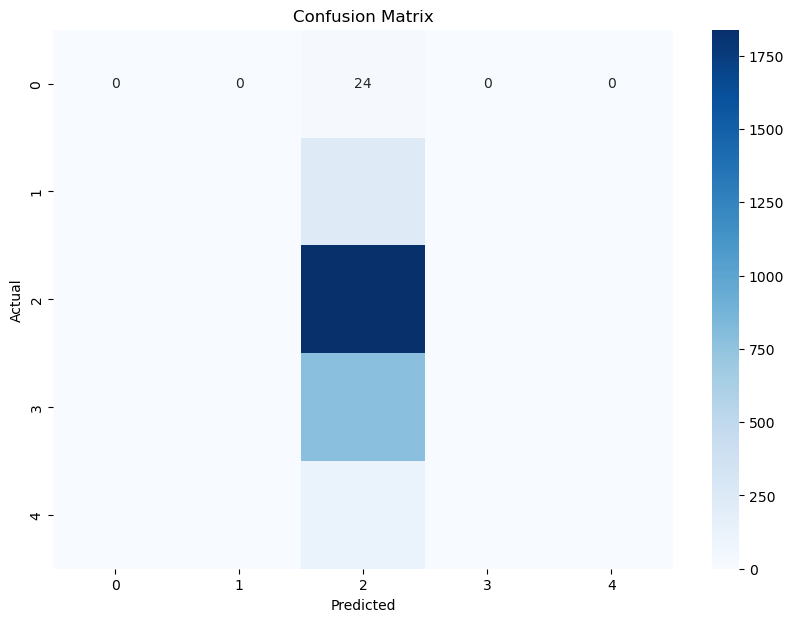

In [41]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_train, y_title), 
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
genre_train = train_genre.iloc[X_train.index]
genre_test = test_genre.iloc[X_test.index]
plot_train = train_plot_keywords.iloc[X_train.index]
plot_test = test_plot_keywords.iloc[X_test.index]
combined_train = pd.concat([title_train, genre_train, plot_train], axis=1)
combined_test = pd.concat([title_test, genre_test, plot_test], axis=1)

In [43]:
param_range = np.logspace(-1, 2, 10)

train_scores, validation_scores = validation_curve(
    LogisticRegression(max_iter=1000), combined_train, y_train, 
    param_name='C', param_range=param_range, cv=5, n_jobs=-1
)

In [44]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

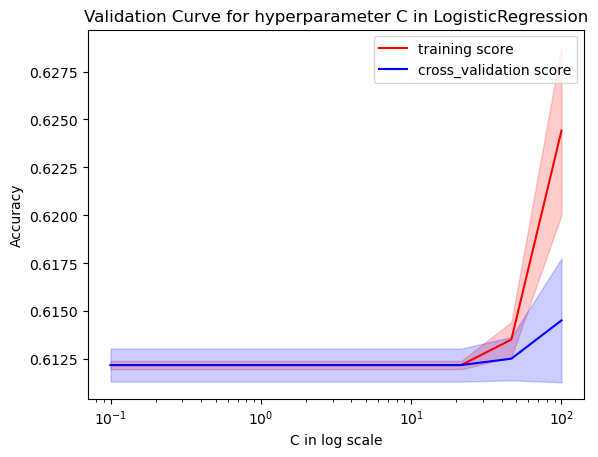

In [45]:
plt.semilogx(param_range, mean_train_scores, label='training score', color='r')
plt.fill_between(param_range, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.semilogx(param_range, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(param_range, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Validation Curve for hyperparameter C in LogisticRegression')
plt.xlabel('C in log scale')
plt.ylabel('Accuracy')
plt.show()

In [46]:
mean_valid_scores, param_range

(array([0.61218414, 0.61218414, 0.61218414, 0.61218414, 0.61218414,
        0.61218414, 0.61218414, 0.61218414, 0.61251692, 0.61451414]),
 array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
          2.15443469,   4.64158883,  10.        ,  21.5443469 ,
         46.41588834, 100.        ]))

#### 3.5 Multilayer perceptron

In [47]:
train_size, train_scores, validation_scores = learning_curve(
    mlp_clf, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1, 15), cv=5, n_jobs=-1
)

In [48]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

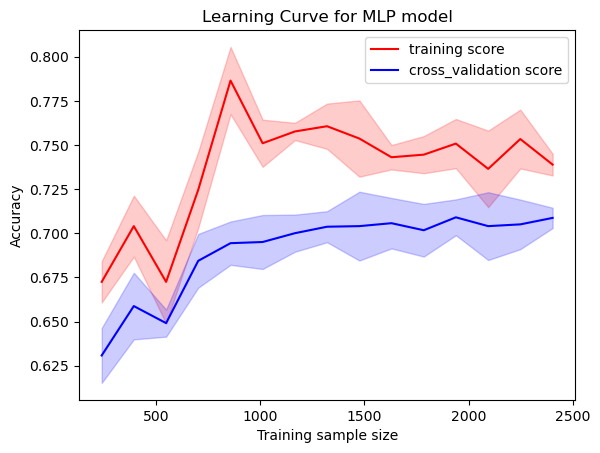

In [49]:
plt.plot(train_size, mean_train_scores, label='training score', color='r')
plt.fill_between(train_size, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for MLP model')
plt.xlabel('Training sample size')
plt.ylabel('Accuracy')
plt.show()

In [50]:
mlp_clf.loss_curve_

[1.0999137682218272,
 0.8307175375368709,
 0.7631055825170392,
 0.7249290374610567,
 0.7024829259166266,
 0.6754868995888462,
 0.6659126498456411,
 0.6542910030492936,
 0.6426128489350015,
 0.6373449722516998,
 0.6262539460450989,
 0.6161461466203194,
 0.6155772104224905,
 0.6081684956882276,
 0.5954387312000187,
 0.5918412924925502,
 0.5912155682668084,
 0.5834744988195552,
 0.5683778589968962,
 0.5720047505298038,
 0.5799861262188223,
 0.5698583526387032,
 0.5586000152369212,
 0.5597534017299236,
 0.5522798816188832,
 0.5521160103811418,
 0.5457793631593234,
 0.5452873652590098,
 0.5443365210493107]

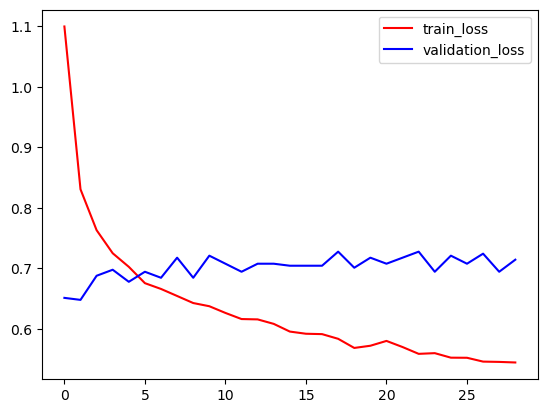

In [51]:
plt.plot(mlp_clf.loss_curve_, color='r', label='train_loss')
plt.plot(mlp_clf.validation_scores_, color='b', label='validation_loss')
plt.legend()